In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.linear_model import Ridge ,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [4]:
df=pd.read_csv("/content/Walmart_Store_sales.csv")

In [5]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

Number of rows : 150



In [6]:
print("Display of dataset: ")
display(df.head())
print()

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [7]:
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [8]:
#missing values checking nd count
df.isnull().any().value_counts()

True     7
False    1
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [10]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [11]:
#checking cols before droping
print('nbr of missin values in col Date ',df['Date'].isnull().sum())

nbr of missin values in col Date  18


In [12]:
print('lets copy data to work on ')
df2=df.copy()

lets copy data to work on 


In [13]:
#drop flad holiday col
print("drop in progress...")
df2=df2.drop(['Date'],axis=1)

drop in progress...


In [14]:
print('Drop done')
display(df2.head())

Drop done


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [15]:
#nbr of missin line in weekly slas
df2["Weekly_Sales"].isnull().sum()

14

In [16]:
print('Dropping outliers in Age...')
to_keep = df2['Weekly_Sales'].isnull()!=True # We want keeping positives values or missings
df2 = df2.loc[to_keep,:] 
print('Done. Number of lines remaining : ', df2.shape[0])
print()


Dropping outliers in Age...
Done. Number of lines remaining :  136



In [17]:
df2["Weekly_Sales"].isnull().sum()

0

In [18]:
df2["Store"].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [19]:
fig = px.histogram(x = df2['Weekly_Sales'], nbins = 120, title = "Distribution of Weekly Sales")
fig.show()

<Axes: >

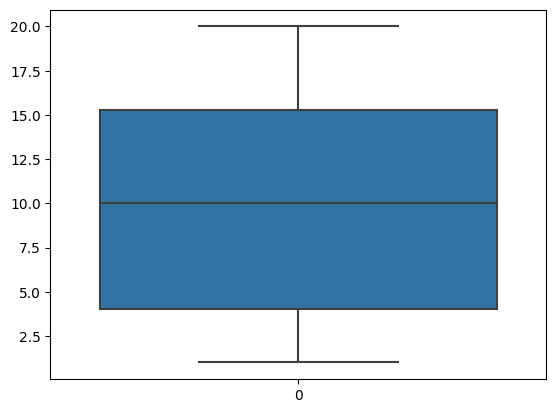

In [20]:
import seaborn as sns
sns.boxplot(df2['Store'])

In [21]:
# Correlation matrix
corr_matrix = df2.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

In [22]:
df2.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [23]:
# Separate target variable Y from features X
print("Separating labels from features...")
# features_list = ["Fuel_Price","Unemployment","Temperature","CPI"]


X = df2.loc[:,['Store', 'Holiday_Flag', 'Temperature','Fuel_Price', 'CPI', 'Unemployment']]
Y = df2.loc[:,['Weekly_Sales']]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
   Weekly_Sales
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0    6.0           NaN        59.61       3.045  214.777523         6.858
1   13.0           0.0        42.38       3.435  128.616064         7.470
3   11.0           0.0        84.57         NaN  214.556497         7.346
4    6.0           0.0        78.89       2.759  212.412888         7.092
5    4.0           0.0          NaN       2.756  126.160226         7.896


In [24]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [25]:
# Create pipeline for numeric features
numeric_features = ["Fuel_Price","Unemployment","Temperature","CPI"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',missing_values=np.nan)), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [26]:
# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [27]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [28]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
48     1.0           NaN        91.65       3.684  215.544618         7.962
85     2.0           0.0        44.69       2.976  211.064888         8.028
24    19.0           0.0        50.76       4.124  138.033200         8.150
125    3.0           0.0        63.91       3.308  221.643285         7.197
91    17.0           0.0        68.91       3.630         NaN         5.936
...Done.
  (0, 0)	0.873325821332278
  (0, 1)	0.30010836673036834
  (0, 2)	1.7897254402863787
  (0, 3)	0.9056666165005199
  (1, 0)	-0.6851596529571025
  (1, 1)	0.3474467109746308
  (1, 2)	-0.8595636262198436
  (1, 3)	0.7907781173095498
  (1, 4)	1.0
  (2, 0)	1.8418761160883894
  (2, 1)	0.43495092306251476
  (2, 2)	-0.5171193197102021
  (2, 3)	-1.0822145019981433
  (2, 21)	1.0
  (3, 0)	0.04565556944978207
  (3, 1)	-0.2485860779190617
  (3, 2)	0.22474931795071815
  (3, 3)	1.0620748681839958
  (3, 5)	1

In [29]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on test set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
94    14.0           0.0        78.47       3.760  186.139981         8.625
137   10.0           0.0        88.44       3.112  126.128355         9.199
41    16.0           0.0          NaN       3.659  198.126718         6.061
88    20.0           0.0        39.79       3.739  213.472512         6.961
58     6.0           0.0          NaN       2.640  212.894485         6.973
...Done.
  (0, 0)	1.0406208722446966
  (0, 1)	0.7756435520932058
  (0, 2)	1.0461643266460035
  (0, 3)	0.15154645466599598
  (0, 16)	1.0
  (1, 0)	-0.3857895618506684
  (1, 1)	1.1873436974902936
  (1, 2)	1.6086305104847392
  (1, 3)	-1.387529739447798
  (1, 12)	1.0
  (2, 0)	0.8182945545847707
  (2, 1)	-1.0633793970324623
  (2, 2)	0.04421854680889749
  (2, 3)	0.4589619292150227
  (2, 18)	1.0
  (3, 0)	0.9943946081767914
  (3, 1)	-0.4178565209743102
  (3, 2)	-1.1360013695307567
  (3, 3)	0.852524753090405

In [30]:
type(X_train)

scipy.sparse._csr.csr_matrix

In [31]:
# Train model
print("Train model...")
model1 = LinearRegression()
model1.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [32]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model1.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[[1455655.02606006]
 [1963332.29865616]
 [1320442.92706105]
 [ 415610.43256897]
 [1094834.92837433]]



In [33]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model1.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[[1998993.02071295]
 [1781857.88711224]
 [ 511325.12806351]
 [1997692.0748889 ]
 [1583159.88362573]]



In [34]:
# Print scores
print("Accuracy on training set : ", model1.score(X_train, Y_train)) # Here, the features must be passed first, and then the true label
print("Accuracy on test set : ", model1.score(X_test, Y_test))

Accuracy on training set :  0.960258885825174
Accuracy on test set :  0.954555915092416


In [35]:
print("Constant is: ", model1.intercept_)
print("coefficients are: ", model1.coef_) 

print()

Constant is:  [1429688.09365948]
coefficients are:  [[  -51736.39613229   -71394.85995289   -25394.15395372   152400.91520414
    380659.22318993 -1185617.23782859   901276.16273723 -1272962.7596569
    -76002.93058465  -893977.01304827  -749023.06473384 -1151492.53042786
    669291.28185812    56621.22012708   250483.99071458   766005.13530777
    681990.50308321  -552885.7177989  -1020770.50296594  -432428.43478541
    -40759.20242279   168898.7989431    430844.22051984   -21485.07652448]]



In [36]:
model1.coef_

array([[  -51736.39613229,   -71394.85995289,   -25394.15395372,
          152400.91520414,   380659.22318993, -1185617.23782859,
          901276.16273723, -1272962.7596569 ,   -76002.93058465,
         -893977.01304827,  -749023.06473384, -1151492.53042786,
          669291.28185812,    56621.22012708,   250483.99071458,
          766005.13530777,   681990.50308321,  -552885.7177989 ,
        -1020770.50296594,  -432428.43478541,   -40759.20242279,
          168898.7989431 ,   430844.22051984,   -21485.07652448]])

# MAE MSE... **METRICS** 

In [37]:
mae = metrics.mean_absolute_error(Y_test, Y_test_pred)
mse = metrics.mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(Y_test, Y_test_pred)
print("=========================================")
print("MAE:",mae)
print('')
print("MSE:", mse)
print('')
print("RMSE:", rmse)
print('')
print("R²:", r2)
print("========================================")   

MAE: 104145.52546721886

MSE: 17114501996.418818

RMSE: 130822.40632406522

R²: 0.954555915092416


In [38]:
names=['MAE','MSE','RMSE','R²']
l=[mae,mse,rmse,r2]
tl=np.array(l).T.tolist()
tl

[104145.52546721886, 17114501996.418818, 130822.40632406522, 0.954555915092416]

In [39]:
s = pd.DataFrame(data = tl,index=names,columns = ['valeurs'])
s


,valeurs
MAE,1.041455e+05
MSE,1.711450e+10
RMSE,1.308224e+05
R²,9.545559e-01


In [40]:
a=model1.coef_
a.flatten()

array([  -51736.39613229,   -71394.85995289,   -25394.15395372,
         152400.91520414,   380659.22318993, -1185617.23782859,
         901276.16273723, -1272962.7596569 ,   -76002.93058465,
        -893977.01304827,  -749023.06473384, -1151492.53042786,
         669291.28185812,    56621.22012708,   250483.99071458,
         766005.13530777,   681990.50308321,  -552885.7177989 ,
       -1020770.50296594,  -432428.43478541,   -40759.20242279,
         168898.7989431 ,   430844.22051984,   -21485.07652448])

In [41]:
# As we didn't implement a complex preprocessing pipeline, the column names is just the initial list of features !
column_names = [c for c in df2.columns if c != 'Weekly_Sales' ]


# **lets fight the overfiting**

# **RIDGE**

In [42]:
ridge1 = Ridge() # Ridge(alpha=100000) ect by default equal 1
print(ridge1)
ridge1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", ridge1.score(X_train, Y_train))
print("R2 score on test set : ", ridge1.score(X_test, Y_test))

Ridge()
R2 score on training set :  0.9241038033228304
R2 score on test set :  0.923931169355264


In [43]:
ridge2 = Ridge(alpha=10) 
print(ridge2)
ridge2.fit(X_train, Y_train)

print("R2 score on training set : ", ridge2.score(X_train, Y_train))
print("R2 score on test set : ", ridge2.score(X_test, Y_test))

Ridge(alpha=10)
R2 score on training set :  0.5869635213029897
R2 score on test set :  0.5206225484679123


In [44]:
type(ridge1.coef_) ,type(X.columns)

(numpy.ndarray, pandas.core.indexes.base.Index)

In [45]:
df3 = {'Feature': X.columns,
    'Ridge1': ridge1.coef_,
    'Ridge2': ridge2.coef_}

# coefficients_ridge = pd.DataFrame(data = df3)
# coefficients_ridge.head()

# ***Laso time***

In [52]:
lasso30 = Lasso(alpha = 30)
print(lasso30)
lasso30.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso30.score(X_train, Y_train))
print("R2 score on test set : ", lasso30.score(X_test, Y_test))

Lasso(alpha=30)
R2 score on training set :  0.960255149542106
R2 score on test set :  0.9548908828306433


In [53]:
lasso100 = Lasso(alpha = 100)
print(lasso100)
lasso100.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso100.score(X_train, Y_train))
print("R2 score on test set : ", lasso100.score(X_test, Y_test))

Lasso(alpha=100)
R2 score on training set :  0.9602175112399405
R2 score on test set :  0.9556219222842249


In [57]:
lasso1000 = Lasso(alpha = 1000)
print(lasso1000)
lasso1000.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso1000.score(X_train, Y_train))
print("R2 score on test set : ", lasso1000.score(X_test, Y_test))

Lasso(alpha=1000)
R2 score on training set :  0.9582801856438847
R2 score on test set :  0.9586518663552602


# ***5 Fold cross validation for***

In [58]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.8517514232092935
The standard deviation is :  0.04426491113670334


# ***Gride Search***

In [60]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [1.5, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.9171066726742619


In [61]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

R2 score on training set :  0.9591920183839391
R2 score on test set :  0.9555205305895584
